2020-02-12T10:59:07+01:00

CPython 3.7.6
IPython 7.12.0

numpy 1.18.1
torch 1.4.0
POLO not installed

compiler   : Clang 11.0.0 (clang-1100.0.33.16)
system     : Darwin
release    : 19.3.0
machine    : x86_64
processor  : i386
CPU cores  : 36
interpreter: 64bit
host name  : fortytwo
Git hash   : 5a6d47235a8d457b8d29d0ecc05283d5bec1c91b
Git repo   : https://github.com/bicv/POLO/
Git branch : master
800px-Fox_Hunt_1893_Winslow_Homer.jpg
homer.jpg
i05june05_static_street_boston_p1010764.jpeg*
i05june05_static_street_boston_p1010764.npy
i05june05_static_street_boston_p1010785.jpeg*
i05june05_static_street_boston_p1010800.jpeg*
i05june05_static_street_boston_p1010806.jpeg*
i05june05_static_street_boston_p1010808.jpeg*


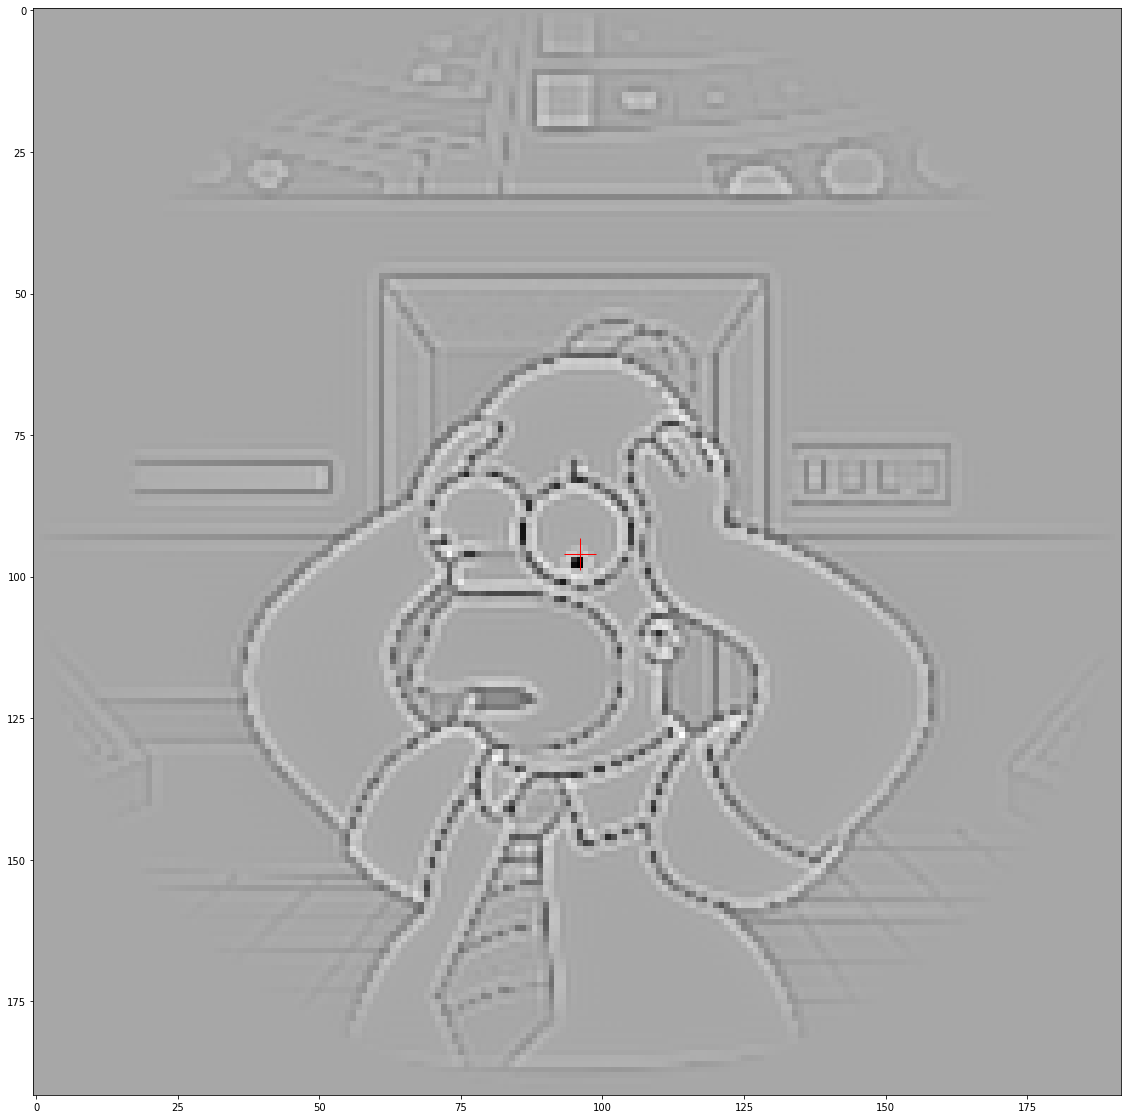

Tensor shape= torch.Size([1, 1, 192, 192])
Tensor shape= torch.Size([1, 1, 96, 96]) , n_levels= 1
Tensor shape= torch.Size([1, 1, 48, 48]) , n_levels= 2
Tensor shape= torch.Size([1, 1, 24, 24]) , n_levels= 3
Tensor shape= torch.Size([1, 3, 32, 32])


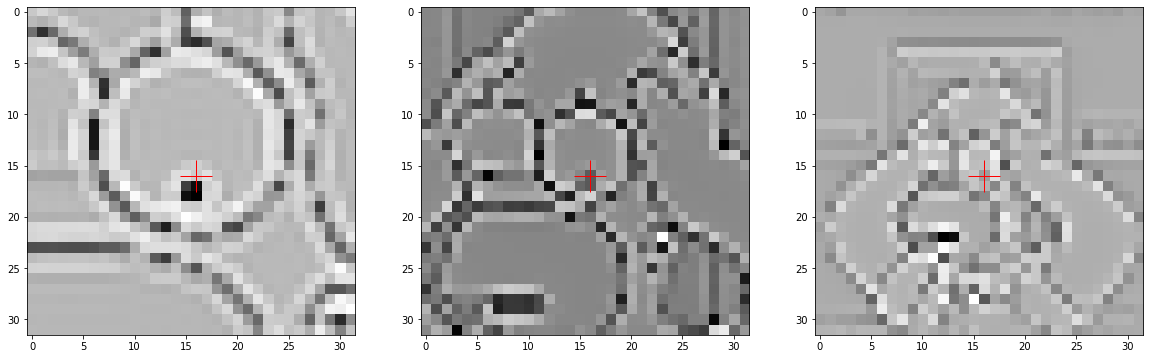

lg shape= 32 32
K shape= (32, 32)
K min max= -0.4102999708906189 1.0


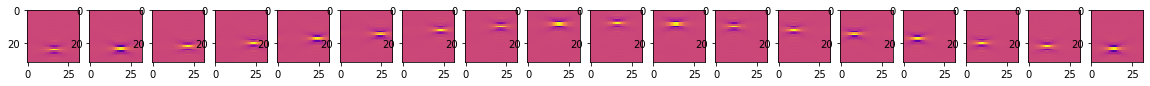

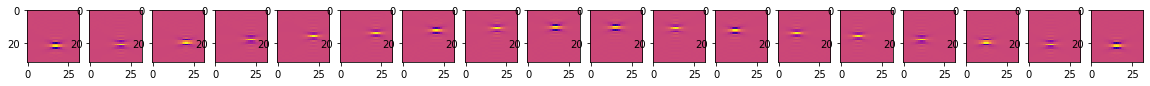

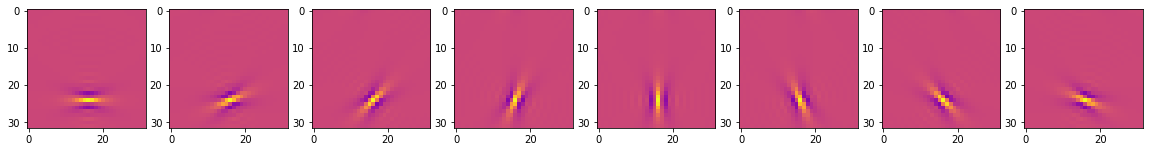

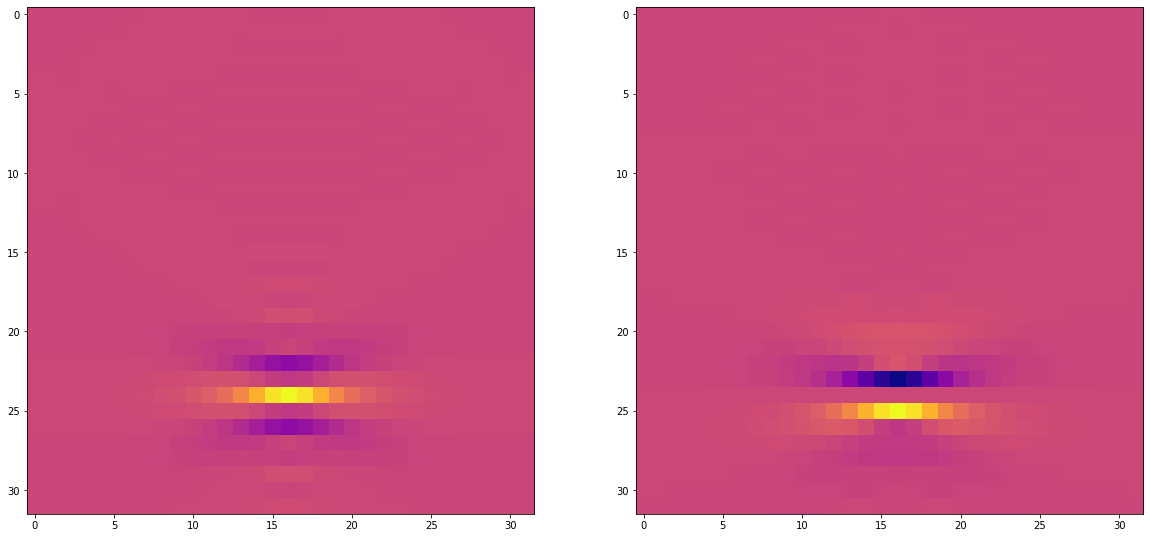

i_sublevel, sf_0, radius 0 0.25 8.0
i_sublevel, sf_0, radius 1 0.3535533905932738 5.65685424949238
K shape= torch.Size([32, 32, 2, 18, 8, 2])
K min max= tensor(-1.) tensor(1.)
Tensor shape= torch.Size([32, 32, 2, 18, 8, 2])
Tensor shape= torch.Size([1, 3, 32, 32])
73.4 µs ± 6.09 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Tensor shape= torch.Size([1, 3, 2, 18, 8, 2])
Tensor shape= torch.Size([1, 3, 32, 32])


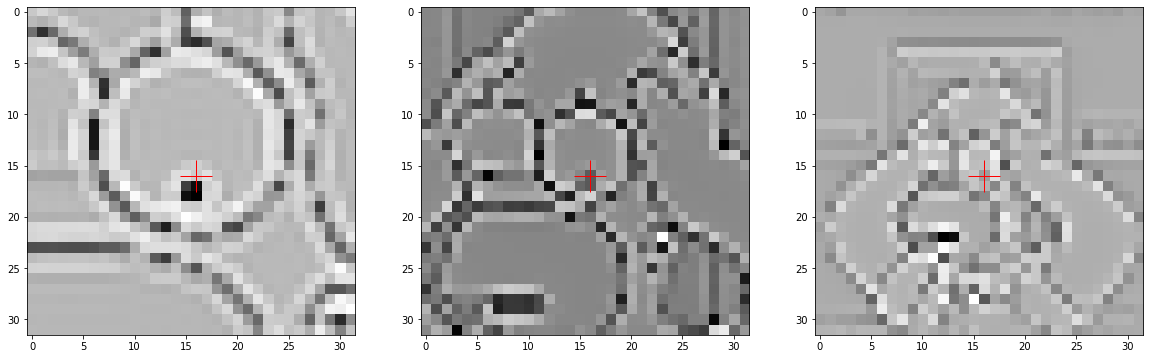

Tensor shape= torch.Size([32, 32, 2, 18, 8, 2])
Tensor shape= torch.Size([1024, 576])
Tensor shape= torch.Size([1, 3, 2, 18, 8, 2])
Tensor shape= torch.Size([1, 3, 576])
Tensor shape= torch.Size([576, 1024])


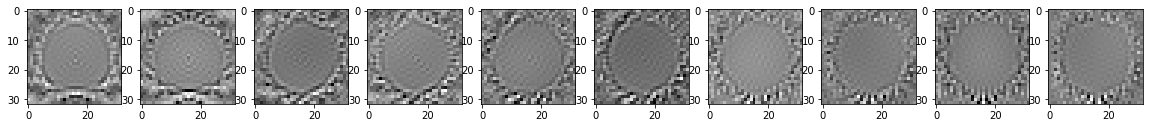

Tensor shape= torch.Size([1, 3, 32, 32])
Tensor shape= torch.Size([1, 3, 32, 32])


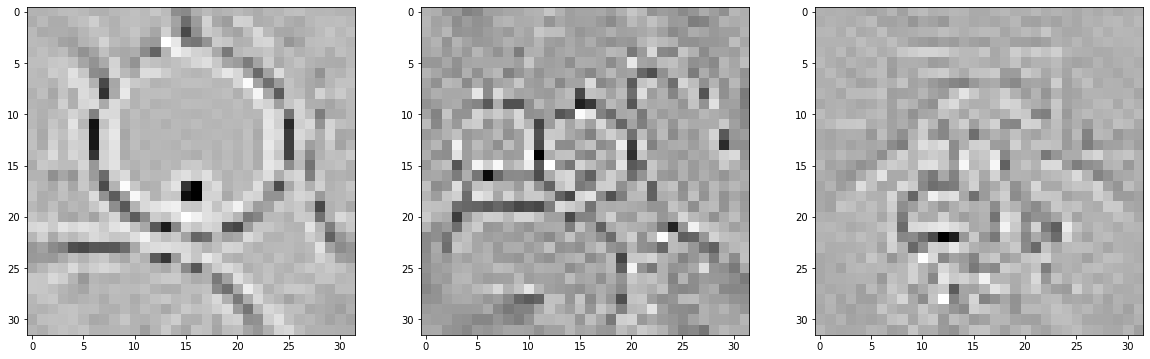

0 torch.Size([128, 1, 192, 192]) torch.Size([128, 3, 2, 18, 8, 2])
using cpu


In [1]:
%run 2020-02-11_retina_reconstruction.ipynb

In [2]:
fname = '2020-02-11_retina_reconstruction-SGD'

In [ ]:
%rm /tmp/{fname}.pt

In [2]:
try:
    invert = torch.load(f'/tmp/{fname}.pt')
except:
    import time
    n_in, n_out = n_levels*n_sublevel*n_azimuth*n_theta*n_phase, np.prod(img_orig.shape)
    invert = Invert(n_in=n_in, n_out=n_out, verbose=True)

    # set a relative precision required proportional to the mask
    mask_ = im.mask.ravel()
    mask_im = torch.from_numpy(mask_[None, None, :])
    mask_w = torch.from_numpy(mask_[:, None])
    #print(mask_.shape)
    
    def init_weights(m):
        print(m)
        if type(m) == torch.nn.Linear:
            m.weight.data = K.std() * torch.randn_like(m.weight.data) * (mask_w * torch.ones((1, n_in)))
    invert.KT.apply(init_weights)

    #optimizer = torch.optim.SGD(params, lr=lr)
    optimizer = torch.optim.SGD(invert.parameters(), lr=lr, momentum=.5, dampening=0, weight_decay=0.01, nesterov=True)
    criterion = torch.nn.MSELoss() 

    # ----------
    #  Training
    # ----------
    loss_0 = None
    invert.train()
    for epoch in range(n_epochs):
        t_batch = time.time()
        for batch_idx, (target, x) in enumerate(dataloader):
            target = target.squeeze(1)
            target = target.reshape((target.shape[0], target.shape[1]*target.shape[2]))
            x = x.reshape((target.shape[0], n_levels*n_sublevel*n_azimuth*n_theta*n_phase))

            target, x = target.to(device), x.to(device)

            optimizer.zero_grad()
            im_rec = invert(x)
            if loss_0 is None:
                loss_0 = criterion(target, torch.zeros_like(target))
            loss = criterion(target, im_rec) / loss_0
            #loss = criterion(target*mask_im, im_rec*mask_im) / loss_0
            loss.backward()
            optimizer.step()

        print("[Epoch %d/%d][loss: %f] [Time: %fs]" % (epoch+1, n_epochs, loss.item(), time.time()-t_batch))

    invert.eval()
    torch.save(invert, f'/tmp/{fname}.pt')

n_in, n_out= 1728 36864
Linear(in_features=1728, out_features=36864, bias=False)
[Epoch 1/100][loss: 63.433669] [Time: 1.196900s]
[Epoch 2/100][loss: 63.006558] [Time: 1.254308s]
[Epoch 3/100][loss: 62.512684] [Time: 1.127429s]
[Epoch 4/100][loss: 61.988895] [Time: 1.007947s]
[Epoch 5/100][loss: 61.453558] [Time: 0.969863s]
[Epoch 6/100][loss: 60.915793] [Time: 0.982992s]
[Epoch 7/100][loss: 60.380100] [Time: 1.483155s]
[Epoch 8/100][loss: 59.848679] [Time: 1.110349s]
[Epoch 9/100][loss: 59.322579] [Time: 1.000263s]
[Epoch 10/100][loss: 58.802278] [Time: 0.881562s]
[Epoch 11/100][loss: 58.287972] [Time: 1.002957s]
[Epoch 12/100][loss: 57.779713] [Time: 0.942839s]
[Epoch 13/100][loss: 57.277485] [Time: 0.936282s]
[Epoch 14/100][loss: 56.781237] [Time: 0.928454s]
[Epoch 15/100][loss: 56.290902] [Time: 0.910382s]
[Epoch 16/100][loss: 55.806407] [Time: 1.088187s]
[Epoch 17/100][loss: 55.327673] [Time: 1.426557s]
[Epoch 18/100][loss: 54.854622] [Time: 0.905662s]
[Epoch 19/100][loss: 54.3871

## reconstructing one image

In [3]:
img_tens = torch.Tensor(img_orig[None, None, ...])

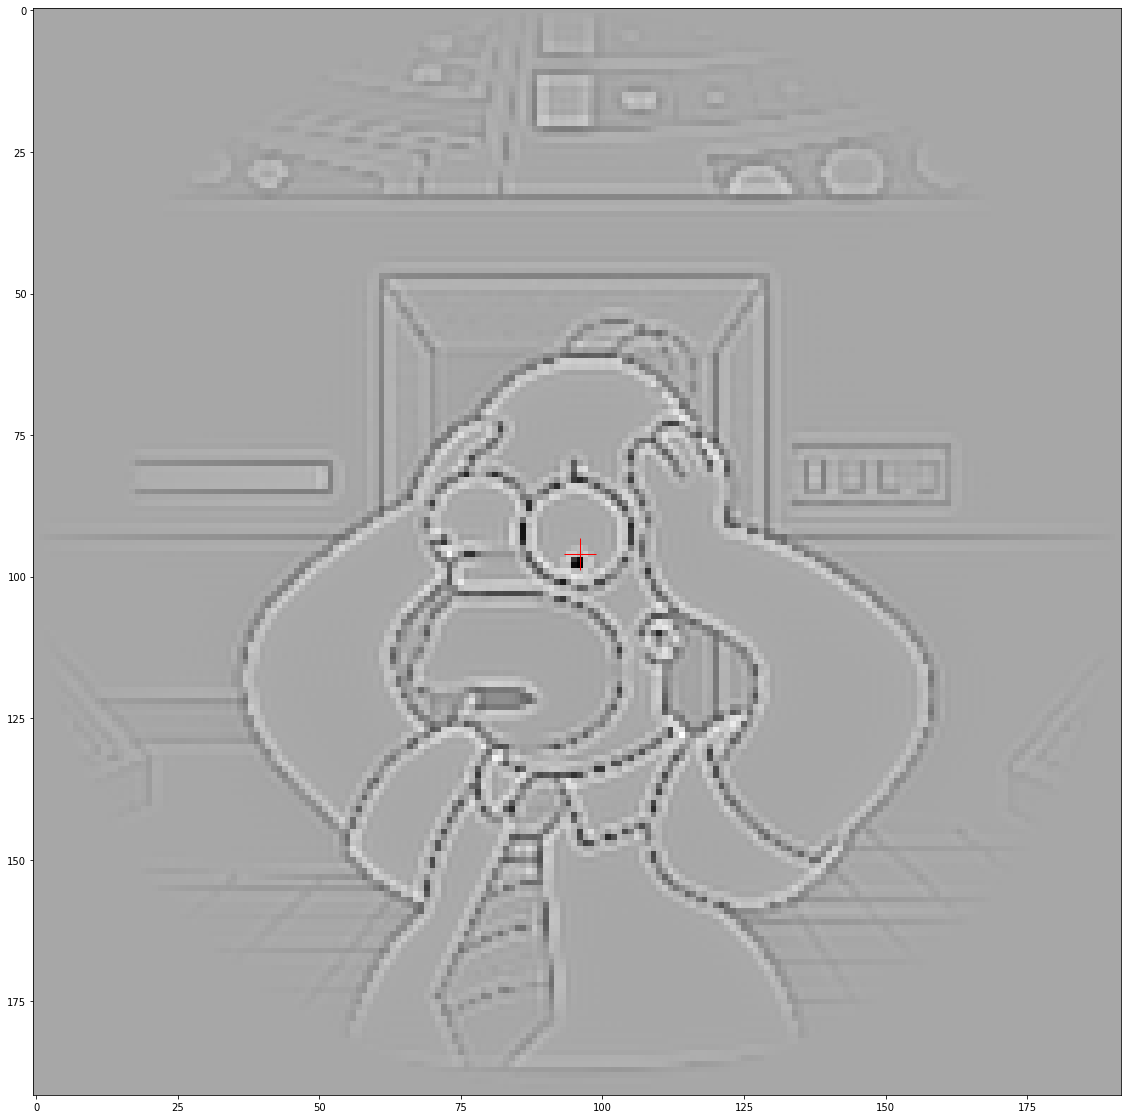

In [4]:
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(img_tens[0, 0, ...].detach().numpy(), cmap='gray')
ax.plot([img_orig.shape[1]/2], [img_orig.shape[0]/2], 'r+', ms=32);

In [5]:
x = torch.tensordot(cropped_pyramid(img_tens), K, dims=2)
x = x.reshape((1, n_levels*n_sublevel*n_azimuth*n_theta*n_phase))
im_rec = invert(x).reshape(img_tens.shape)
print(im_rec.shape)

torch.Size([1, 1, 192, 192])


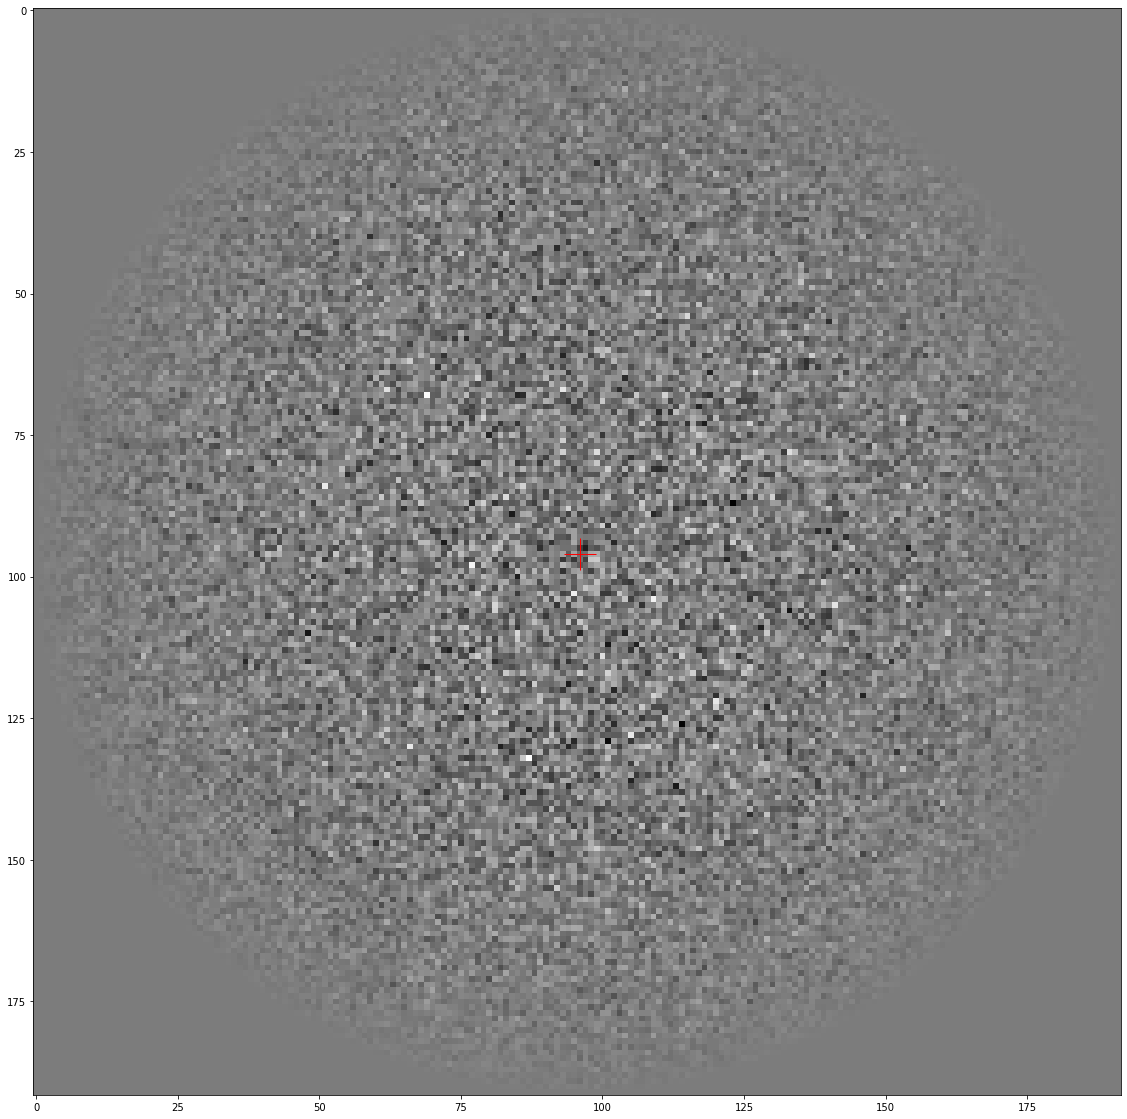

In [6]:
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(im_rec[0, 0, ...].detach().numpy(), cmap='gray')
ax.plot([img_orig.shape[1]/2], [img_orig.shape[0]/2], 'r+', ms=32);